# Import the data and display the head, shape and description of the data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\hp123\\Desktop\\KNN\\diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#  Univariate and Bivariate Analysis


<AxesSubplot:xlabel='price', ylabel='Density'>

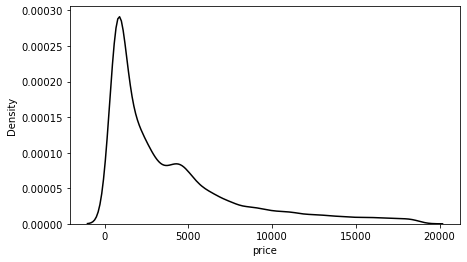

In [6]:
fig = plt.subplots(figsize=(7,4))
sns.kdeplot(data=df, x="price",color="k")

<AxesSubplot:xlabel='carat', ylabel='Count'>

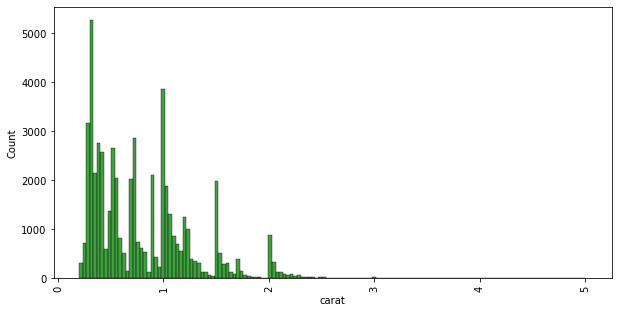

In [7]:
fig=plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.histplot(data=df,x="carat",color="g")

<AxesSubplot:xlabel='cut', ylabel='count'>

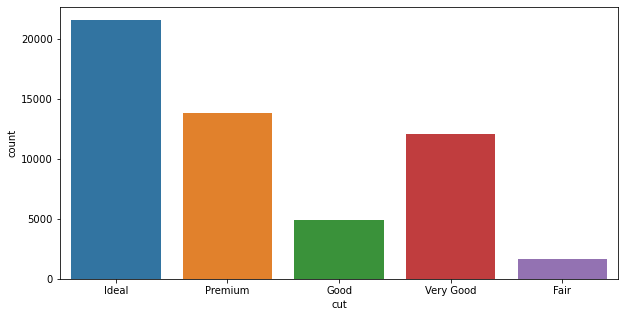

In [8]:
fig=plt.subplots(figsize=(10,5))

sns.countplot(x = df['cut']) 

<AxesSubplot:xlabel='cut', ylabel='price'>

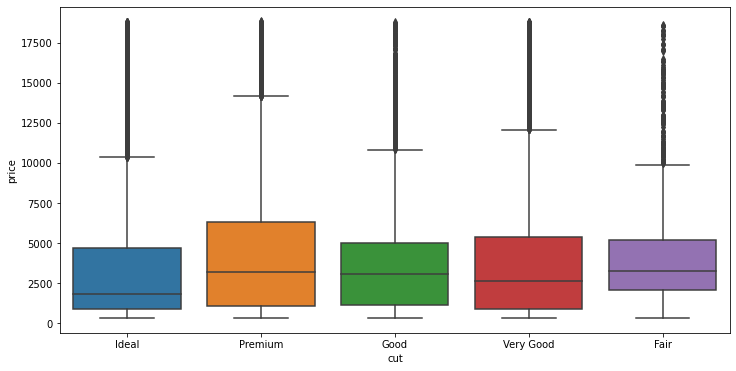

In [9]:
fig=plt.subplots(figsize=(12,6))
sns.boxplot(x="cut", y="price", data=df)

In [10]:

# fig=plt.subplots(figsize=(15,7))
# plt.xticks(rotation=90)
# sns.scatterplot(x = "carat", y = "depth", data = df, hue = "color")

In [11]:
# sns.pairplot( df, x_vars=["x", "y", "z"],
#                   y_vars=["x", "y","z"],
#                   hue="cut")

In [12]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [13]:
df_cat = df.select_dtypes(include=['object'])

df_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [14]:
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.head()

,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335


In [15]:
df_cat.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

df_cat['cut'] = df_cat['cut'].apply(lambda x : cut_encoder[x])

df_cat.head()

C:\Users\hp123\AppData\Local\Temp/ipykernel_6484/3224539358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['cut'] = df_cat['cut'].apply(lambda x : cut_encoder[x])


,cut,color,clarity
0,4,E,SI2
1,5,E,SI1
2,2,E,VS1
3,5,I,VS2
4,2,J,SI2


In [17]:
df_cat.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [18]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

df_cat['color'] = df_cat['color'].apply(lambda x : color_encoder[x])

df_cat.head()

C:\Users\hp123\AppData\Local\Temp/ipykernel_6484/1086045690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['color'] = df_cat['color'].apply(lambda x : color_encoder[x])


,cut,color,clarity
0,4,6,SI2
1,5,6,SI1
2,2,6,VS1
3,5,2,VS2
4,2,1,SI2


In [19]:
df_cat.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [20]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

df_cat['clarity'] = df_cat['clarity'].apply(lambda x : clarity_encoder[x])

df_cat.head()

C:\Users\hp123\AppData\Local\Temp/ipykernel_6484/3396624930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['clarity'] = df_cat['clarity'].apply(lambda x : clarity_encoder[x])


,cut,color,clarity
0,4,6,2
1,5,6,3
2,2,6,5
3,5,2,4
4,2,1,2


In [21]:
inputs = pd.concat([df_num, df_cat], axis=1)

inputs.head()

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,326,4,6,2
1,0.21,59.8,61.0,3.89,3.84,2.31,326,5,6,3
2,0.23,56.9,65.0,4.05,4.07,2.31,327,2,6,5
3,0.29,62.4,58.0,4.20,4.23,2.63,334,5,2,4
4,0.31,63.3,58.0,4.34,4.35,2.75,335,2,1,2


In [22]:
target=df["price"]
inputs_1=inputs[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

In [23]:
inputs_1

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,5,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,5,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,7,3,60.8,57.0,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,5.66,5.68,3.56
53938,0.86,5,3,2,61.0,58.0,6.15,6.12,3.74


# Step - 3: Split the data - Train and Test 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_1, target, train_size=0.75, random_state=100)
X_train

,carat,cut,color,clarity,depth,table,x,y,z
33169,0.30,4,7,5,61.9,54.1,4.28,4.33,2.67
53170,0.71,5,6,3,59.5,62.0,5.85,5.74,3.45
27846,0.30,4,7,5,62.2,56.0,4.27,4.31,2.67
20880,1.02,5,5,6,62.9,59.0,6.42,6.37,4.02
28554,0.30,5,3,5,60.1,61.0,4.32,4.30,2.59
...,...,...,...,...,...,...,...,...,...
16304,1.07,3,4,4,62.9,59.0,6.49,6.52,4.09
79,0.26,3,6,7,62.6,59.0,4.06,4.09,2.55
12119,0.91,5,4,6,61.8,58.0,6.24,6.16,3.83
14147,1.25,5,2,3,62.4,58.0,6.89,6.85,4.29


In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                      columns = X_train.columns)

X_train

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.050294,0.235191,1.529921,0.576753,0.099874,-1.495687,-1.293573,-1.220387,-1.249413
1,-0.186302,1.210454,0.941277,-0.641148,-1.572250,2.031741,0.105090,0.003601,-0.128311
2,-1.050294,0.235191,1.529921,0.576753,0.308890,-0.647318,-1.302482,-1.237749,-1.249413
3,0.466960,1.210454,0.352633,1.185703,0.796592,0.692211,0.612885,0.550489,0.690955
4,-1.050294,1.210454,-0.824654,0.576753,-1.154219,1.585231,-1.257938,-1.246430,-1.364397
...,...,...,...,...,...,...,...,...,...
40450,0.572325,-0.740072,-0.236010,-0.032197,0.796592,0.692211,0.675245,0.680700,0.791567
40451,-1.134586,-0.740072,0.941277,1.794654,0.587577,0.692211,-1.489564,-1.428726,-1.421890
40452,0.235157,1.210454,-0.236010,1.185703,0.030202,0.245701,0.452528,0.368193,0.417866
40453,0.951639,1.210454,-1.413298,-0.641148,0.448233,0.245701,1.031593,0.967166,1.079029


In [27]:

X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns = X_test.columns)

X_test

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.481324,0.235191,0.941277,-0.032197,-0.178813,-0.200809,-0.340344,-0.360992,-0.372654
1,0.761982,0.235191,-0.236010,0.576753,-0.178813,-1.093828,0.906871,0.932443,0.906552
2,-0.607762,0.235191,-0.236010,-0.641148,1.005608,0.245701,-0.607605,-0.569330,-0.487639
3,-0.797419,0.235191,0.352633,0.576753,-0.805860,-0.647318,-0.803596,-0.751626,-0.861339
4,0.003355,1.210454,-0.236010,2.403604,0.587577,0.245701,0.140725,0.168535,0.231016
...,...,...,...,...,...,...,...,...,...
13480,-0.544543,0.235191,1.529921,-0.032197,0.587577,-0.200809,-0.491792,-0.430438,-0.401400
13481,0.424814,0.235191,-1.413298,-1.250098,0.517905,-0.647318,0.577250,0.533127,0.633463
13482,-1.008148,0.235191,-1.413298,1.185703,-0.178813,-0.647318,-1.186669,-1.142260,-1.191920
13483,-0.734200,0.235191,-1.413298,0.576753,0.099874,-1.540338,-0.696691,-0.664818,-0.674489


In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


In [29]:
y_test.head()

52264    2491
21073    9248
42161    1284
35974     921
7641     4268
Name: price, dtype: int64

In [30]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.050294,0.235191,1.529921,0.576753,0.099874,-1.495687,-1.293573,-1.220387,-1.249413
1,-0.186302,1.210454,0.941277,-0.641148,-1.572250,2.031741,0.105090,0.003601,-0.128311
2,-1.050294,0.235191,1.529921,0.576753,0.308890,-0.647318,-1.302482,-1.237749,-1.249413
3,0.466960,1.210454,0.352633,1.185703,0.796592,0.692211,0.612885,0.550489,0.690955
4,-1.050294,1.210454,-0.824654,0.576753,-1.154219,1.585231,-1.257938,-1.246430,-1.364397


In [31]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.050294,0.235191,1.529921,0.576753,0.099874,-1.495687,-1.293573,-1.220387,-1.249413
1,-0.186302,1.210454,0.941277,-0.641148,-1.572250,2.031741,0.105090,0.003601,-0.128311
2,-1.050294,0.235191,1.529921,0.576753,0.308890,-0.647318,-1.302482,-1.237749,-1.249413
3,0.466960,1.210454,0.352633,1.185703,0.796592,0.692211,0.612885,0.550489,0.690955
4,-1.050294,1.210454,-0.824654,0.576753,-1.154219,1.585231,-1.257938,-1.246430,-1.364397


In [32]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [33]:
y_test_pred = regressor.predict(X_test) 

In [34]:
y_test.head()

52264    2491
21073    9248
42161    1284
35974     921
7641     4268
Name: price, dtype: int64

In [35]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,1779.6
21073,9248,9000.6
42161,1284,1136.6
35974,921,960.4
7641,4268,3800.0


In [36]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  381.0029959213942
Mean Squared Error:  577902.3010426399
Root Mean Squared Error:  760.1988562492315


In [37]:
target=pd.DataFrame(target)

In [38]:
target

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [39]:
inputs_1 = inputs[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color',
       'clarity']]

In [40]:
inputs_1.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,4,6,2
1,0.21,59.8,61.0,3.89,3.84,2.31,5,6,3
2,0.23,56.9,65.0,4.05,4.07,2.31,2,6,5
3,0.29,62.4,58.0,4.20,4.23,2.63,5,2,4
4,0.31,63.3,58.0,4.34,4.35,2.75,2,1,2


In [41]:
target.head()

,price
0,326
1,326
2,327
3,334
4,335


In [42]:
inputs_2=inputs_1.iloc[:500,:]
target_1=target.iloc[:500,:]

In [43]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from collections import Counter
import matplotlib.pyplot as plt 
def numpy_distance(x,y):
    return np.linalg.norm(x-y) ### Calculates Euclidean distance between two points
### loading of data set

X = inputs_2.to_numpy()    ## making X as the features or the input parameters                      
X = X[:,0:8]
# print(X)
Y = target_1.to_numpy()  ## Making Y to contain the output(label) of the data points or features
Y = Y[:,0]
# print(Y)

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 , random_state = 77)
avg_prices = []
K = np.arange(1,5)
for k in K:   ## For each value of k we test the model
    prediction = []   ## Prediction of each test case will be stored in this list
    coorect_count = 0  ## how many correct predictions were made
    for i in range(len(X_test)):  ## for each point in testing data we do prediction
        distances = []
        for j in range(len(X_train)):
            dist = numpy_distance(X_test[i], X_train[j])
            ## we are adding the training point, the distance between this training point and
            ## the test point and the label assosciated with the training point
            distances.append((X_train[j], dist, y_train[j]))  
        ## We are sorting this distance list on the basis of distance between the trainin
        ## point and the test point 
        ## key=lambda x: x[1]  here x:x[1] signifies that we will sort this list using 
        ## 2nd(in python indexing starts from 0) column i.e. distance
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k]
        class_counter = Counter()  ## a counter to check which labels appeared how many times
        for neighbor in neighbors:
            class_counter[neighbor[2]] += 1
        prediction.append(class_counter.most_common(1)[0][0])## whichever appers most we predict that label

In [44]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, prediction))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, prediction))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error:  37.11
Mean Squared Error:  3690.83
Root Mean Squared Error:  60.752201606196955


In [45]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

temp_df.head()

,Actual,Predicted
0,2800,2762
1,2805,2817
2,2815,2782
3,404,403
4,2770,2812
